In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

공공 데이터 상권 정보 분석하기 => https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
# 2016년 상권별 업종밀집 통계 => 상권별 밀집도를 보여준다.
# UnicodeDecodeError가 발생되면 encoding = "cp949" 옵션을 지정해서 불러온다.
shop = pd.read_csv("./data/shop_2016.csv", encoding = "cp949")
shop

상권명칭  상권번호    관리년월    대분류명    중분류명  과밀지수(밀집도)
0              강릉역광장_2  2523  201601      소매  가전제품소매     1.0818
1                구미역_3  1149  201601      소매  가전제품소매     0.8865
2       전북 전주시 중화산1동_1   768  201601      소매  가전제품소매     1.1757
3              충청북도청_2  1309  201601      소매  가전제품소매     0.3574
4        충북 청주시 복대1동_1  1311  201601      소매  가전제품소매     0.6849
...                ...   ...     ...     ...     ...        ...
805676    경남 양산시 덕계동_1   626  201612      소매     NaN     1.2906
805677   경북 구미시 신평1동_2  1143  201612  업종분류불능     NaN     0.5677
805678           안양역_5  1663  201612      소매     NaN     1.6597
805679             양산역   616  201612      소매     NaN     1.4103
805680           망포역_2  1473  201612  업종분류불능     NaN     0.7113

[805681 rows x 6 columns]

In [3]:
shop["대분류명"].value_counts()

소매        791413
업종분류불능     14268
Name: 대분류명, dtype: int64

In [4]:
shop["중분류명"].value_counts()

건강/미용식품         98132
유아용품            88434
의약/의료품소매        81273
철물/난방/건설자재소매    78100
페인트/유리제품소매      74083
가전제품소매          71625
자동차/자동차용품       22440
Name: 중분류명, dtype: int64

In [5]:
# 2018년 6월 상가/업소 정보 데이터
shop_2018_06 = pd.read_csv("./data/shop_201806_01.csv", encoding = "cp949")
shop_2018_06

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       19905471         와라와라호프         NaN         Q       음식       Q09   
1       19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12   
2       19911801           프로포즈         NaN         Q       음식       Q09   
3       19912201       싱싱커피&토스트         NaN         Q       음식       Q07   
4       19932756       가락사우나내스낵         NaN         F    생활서비스       F09   
...          ...            ...         ...       ...      ...       ...   
499323  16141434       배스킨라빈스31     건대스타시티점         Q       음식       Q07   
499324  16093390           본도시락        본설렁탕         Q       음식       Q01   
499325  16093078         체크페이먼트         NaN         Q       음식       Q12   
499326  16093122          마젠타네일         NaN         F    생활서비스       F01   
499327  16093154           GS25       역촌대로점         D       소매       D03   

        상권업종중분류명 상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...  \
0           유흥주점    Q09A01        호프/맥주   I56219  ...   
1         커피점/카페    Q12A01  커피전문점/카페/다방   I56220  ...   
2           유흥주점    Q09A01        호프/맥주   I56219  ...   
3          패스트푸드    Q07A10        토스트전문   I56192  ...   
4       대중목욕탕/휴게    F09A02   사우나/증기탕/온천   S96121  ...   
...          ...       ...          ...      ...  ...   
499323     패스트푸드    Q07A07      아이스크림판매   I56191  ...   
499324        한식    Q01A09         설렁탕집   I56111  ...   
499325    커피점/카페    Q12A01  커피전문점/카페/다방   I56220  ...   
499326   이/미용/건강    F01A02       발/네일케어   S96119  ...   
499327     종합소매점    D03A01          편의점   G47122  ...   

                           건물관리번호       건물명                 도로명주소   구우편번호  \
0       1168010600106040000014378      대치상가  서울특별시 강남구 남부순환로 2933  135280   
1       1168010100106960042022041       NaN    서울특별시 강남구 선릉로93길 6  135080   
2       1154510200101620001017748       NaN    서울특별시 금천구 가산로 34-6  153010   
3       2653010400105780000002037  산업용품유통상가      부산광역시 사상구 괘감로 37  617726   
4       1171010500102560005010490       NaN      서울특별시 송파구 가락로 71  138846   
...                           ...       ...                   ...     ...   
499323  1121510500102270007022407    더샵스타시티    서울특별시 광진구 아차산로 262  143730   
499324  1174010900105020000000001      강동타워    서울특별시 강동구 상일로6길 39  134100   
499325  1168010600109050000028207      성아빌딩   서울특별시 강남구 역삼로69길 10  135841   
499326  1144010200104630000002585   마포현대하이엘    서울특별시 마포구 마포대로 173  121862   
499327  1138010800100090007000001      서부빌딩      서울특별시 은평구 연서로 92  122895   

          신우편번호  동정보  층정보  호정보          경도         위도  
0        6280.0  NaN    1  NaN  127.061026  37.493922  
1        6149.0  NaN    1  NaN  127.047883  37.505675  
2        8545.0  NaN    1  NaN  126.899220  37.471711  
3       46977.0  NaN    1   26  128.980455  35.159774  
4        5690.0  NaN    1  NaN  127.104071  37.500249  
...         ...  ...  ...  ...         ...        ...  
499323   5065.0  NaN  NaN  NaN  127.072944  37.536997  
499324   5288.0  NaN  NaN  NaN  127.175331  37.549794  
499325   6196.0  NaN  NaN  NaN  127.054001  37.502210  
499326   4130.0  NaN    1  NaN  126.954442  37.549892  
499327   3401.0  NaN    1  NaN  126.915538  37.607334  

[499328 rows x 39 columns]

In [6]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
view_columns = ['상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
               '시도명', '시군구명', '행정동명', '법정동명', '지번주소', '도로명주소', '경도', 
                '위도']
shop_2018_06[view_columns]

상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    시도명 시군구명  \
0              와라와라호프         NaN         Q       음식       Q09  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12  서울특별시  강남구   
2                프로포즈         NaN         Q       음식       Q09  서울특별시  금천구   
3            싱싱커피&토스트         NaN         Q       음식       Q07  부산광역시  사상구   
4            가락사우나내스낵         NaN         F    생활서비스       F09  서울특별시  송파구   
...               ...         ...       ...      ...       ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점         Q       음식       Q07  서울특별시  광진구   
499324           본도시락        본설렁탕         Q       음식       Q01  서울특별시  강동구   
499325         체크페이먼트         NaN         Q       음식       Q12  서울특별시  강남구   
499326          마젠타네일         NaN         F    생활서비스       F01  서울특별시  마포구   
499327           GS25       역촌대로점         D       소매       D03  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
3        괘법동  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도  
0       37.493922  
1       37.505675  
2       37.471711  
3       35.159774  
4       37.500249  
...           ...  
499323  37.536997  
499324  37.549794  
499325  37.502210  
499326  37.549892  
499327  37.607334  

[499328 rows x 13 columns]

In [8]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

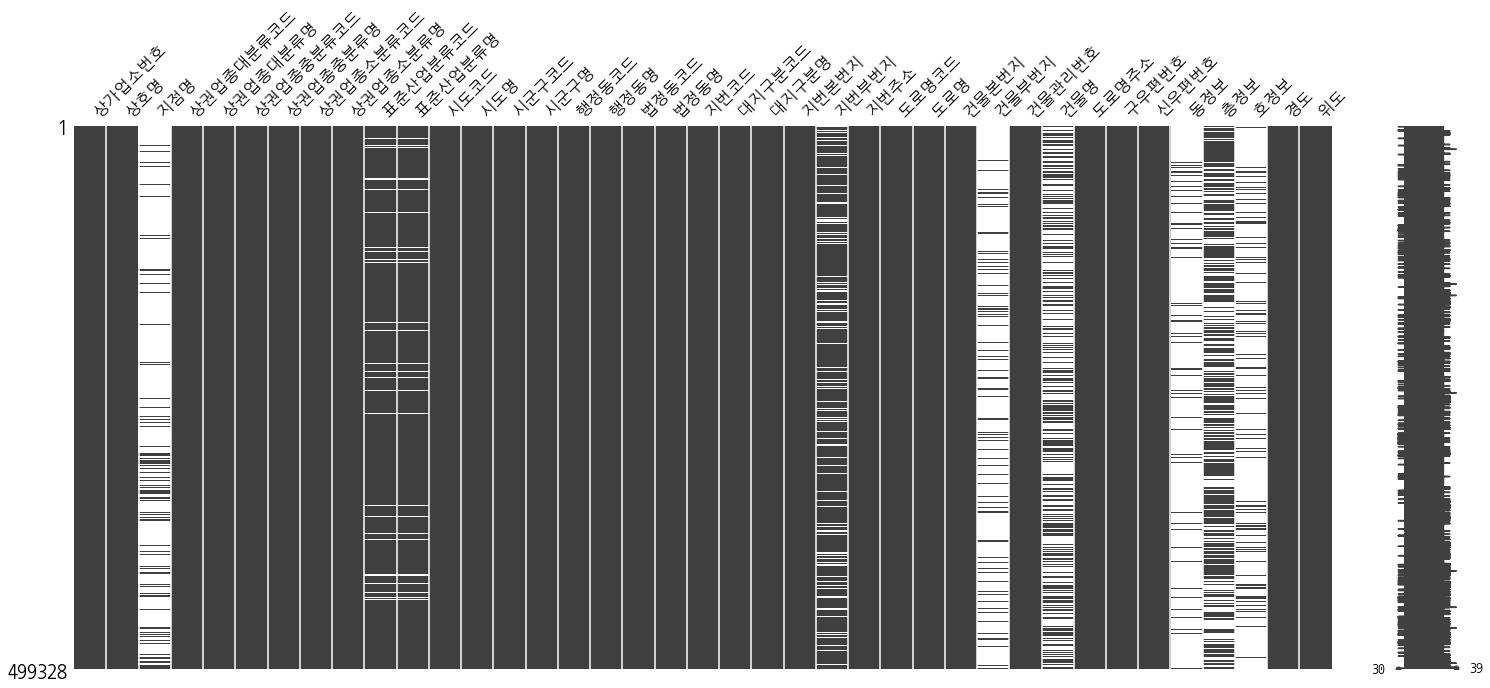

In [9]:
import missingno as msno
msno.matrix(shop_2018_06)

In [10]:
from plotnine import *

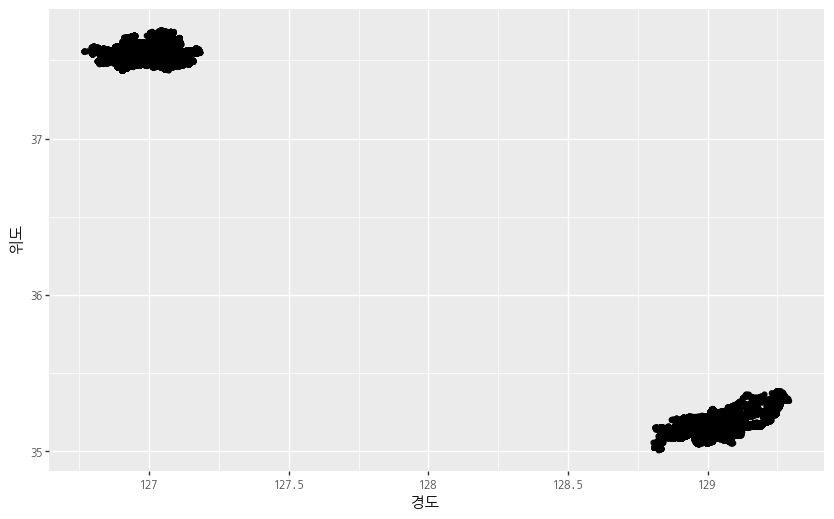

<ggplot: (121498984943)>

In [11]:
ggplot(shop_2018_06, aes(x = "경도", y = "위도")) + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

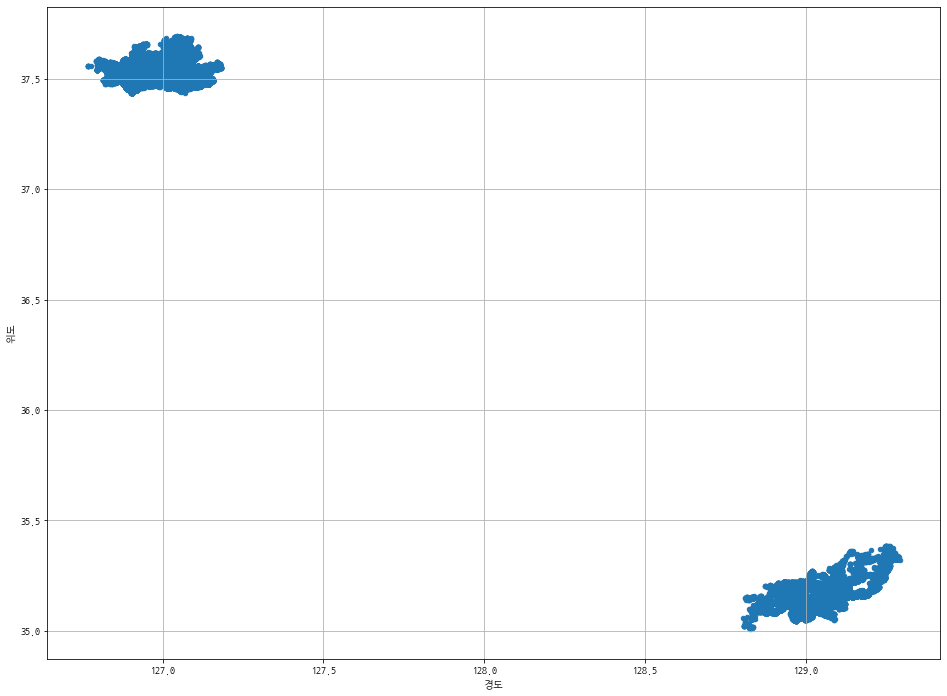

In [12]:
shop_2018_06.plot.scatter(x = "경도", y = "위도", grid = True, figsize = (16, 12))

In [13]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는것 같다. => 그래서 서울과 그 이외의 데이터로 나눈다.
shop_seoul = shop_2018_06.loc[shop_2018_06["도로명주소"].str.startswith("서울")]
shop_seoul.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   
5  19975850           허술한집         NaN         Q       음식       Q04        분식   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378  대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041   NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748   NaN   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490   NaN   
5    Q04A01       라면김밥분식   I56194  ...  1150010800100450031005883   NaN   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080  6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010  8545.0  NaN   1  NaN  126.899220  37.471711  
4      서울특별시 송파구 가락로 71  138846  5690.0  NaN   1  NaN  127.104071  37.500249  
5    서울특별시 강서구 공항대로3길 9  157812  7619.0  NaN   1  NaN  126.809957  37.562013  

[5 rows x 39 columns]

In [14]:
# "~"는 ~가 아닌 것을 의미한다.
shop_except_seoul = shop_2018_06.loc[~shop_2018_06["도로명주소"].str.startswith("서울")]
shop_except_seoul.head()

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
3   19912201  싱싱커피&토스트  NaN         Q       음식       Q07    패스트푸드    Q07A10   
22  20047434    경부할인마트  NaN         D       소매       D03    종합소매점    D03A06   
23  20037352       마니쩜  NaN         Q       음식       Q09     유흥주점    Q09A01   
24  20038373     경주아구찜  NaN         Q       음식       Q03   일식/수산물    Q03A06   
30  20031733  동해제일산오징어  NaN         Q       음식       Q03   일식/수산물    Q03A13   

   상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
3     토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
22     종합소매   G47190  ...  2617010100107940681015812       NaN   
23    호프/맥주   I56219  ...  2623011000104500002043836     가남아파트   
24     아구전문   I56111  ...  2650010500103570010019103       NaN   
30   낙지/오징어   I56111  ...  2626010800113800002003460       NaN   

                       도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도  \
3           부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455   
22          부산광역시 동구 망양로 593  601831  48716.0  NaN   1  NaN  129.034599   
23       부산광역시 부산진구 대학로 64-1  614010  47336.0  NaN   2  NaN  129.034302   
24       부산광역시 수영구 수영로 381-8  613010  48318.0  NaN   1  NaN  129.106330   
30  부산광역시 동래구 아시아드대로220번길 30  607060  47838.0  NaN   1  NaN  129.068324   

           위도  
3   35.159774  
22  35.123196  
23  35.150069  
24  35.141176  
30  35.202902  

[5 rows x 39 columns]

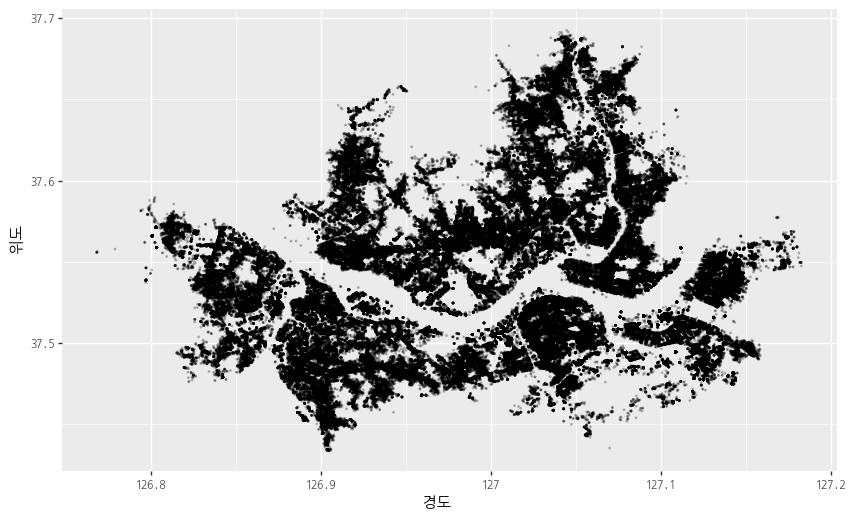

<ggplot: (121526378083)>

In [15]:
# 서울만 찍어봤더니 서울 지도하고 비슷하게 나온다.
ggplot(shop_seoul, aes(x = "경도", y = "위도")) + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

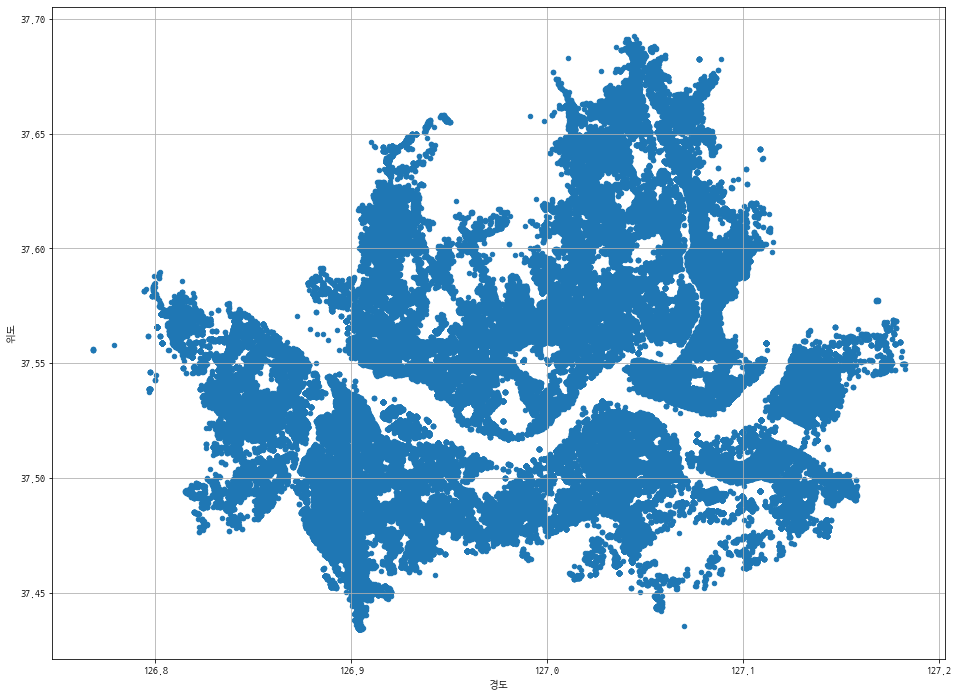

In [16]:
shop_seoul.plot.scatter(x = "경도", y = "위도", grid = True, figsize = (16, 12))

In [17]:
# 데이터프레임의 도로명 주소를 활용해서 "시도", "구군" 열을 만든다.
# split() 메소드의 옵션으로 expand = True를 사용하면 구분자를 경계로 문자열을 구분해서 데이터프레임
# 타입으로 출력한다. => 여러개의 열로 나눈다. => "시도" 열과 "구군" 열을 만든다.
# shop_2018_06["도로명주소"].str.split(" ")
shop_2018_06["시도"] = shop_2018_06["도로명주소"].str.split(" ", expand = True)[0]
shop_2018_06["구군"] = shop_2018_06["도로명주소"].str.split(" ", expand = True)[1]
shop_2018_06.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호    신우편번호  \
0    Q09A01        호프/맥주   I56219  ...  서울특별시 강남구 남부순환로 2933  135280   6280.0   
1    Q12A01  커피전문점/카페/다방   I56220  ...    서울특별시 강남구 선릉로93길 6  135080   6149.0   
2    Q09A01        호프/맥주   I56219  ...    서울특별시 금천구 가산로 34-6  153010   8545.0   
3    Q07A10        토스트전문   I56192  ...      부산광역시 사상구 괘감로 37  617726  46977.0   
4    F09A02   사우나/증기탕/온천   S96121  ...      서울특별시 송파구 가락로 71  138846   5690.0   

   동정보 층정보  호정보          경도         위도     시도   구군  
0  NaN   1  NaN  127.061026  37.493922  서울특별시  강남구  
1  NaN   1  NaN  127.047883  37.505675  서울특별시  강남구  
2  NaN   1  NaN  126.899220  37.471711  서울특별시  금천구  
3  NaN   1   26  128.980455  35.159774  부산광역시  사상구  
4  NaN   1  NaN  127.104071  37.500249  서울특별시  송파구  

[5 rows x 41 columns]

In [18]:
# "시도" 열과 "구군" 열이 추가된 원본 데이터프레임에서 서울만 추출해 서울 데이터프레임을 다시
# 만들어 준다.
shop_seoul = shop_2018_06.loc[shop_2018_06["도로명주소"].str.startswith("서울")]
shop_seoul.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   
5  19975850           허술한집         NaN         Q       음식       Q04        분식   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호   신우편번호  \
0    Q09A01        호프/맥주   I56219  ...  서울특별시 강남구 남부순환로 2933  135280  6280.0   
1    Q12A01  커피전문점/카페/다방   I56220  ...    서울특별시 강남구 선릉로93길 6  135080  6149.0   
2    Q09A01        호프/맥주   I56219  ...    서울특별시 금천구 가산로 34-6  153010  8545.0   
4    F09A02   사우나/증기탕/온천   S96121  ...      서울특별시 송파구 가락로 71  138846  5690.0   
5    Q04A01       라면김밥분식   I56194  ...    서울특별시 강서구 공항대로3길 9  157812  7619.0   

   동정보 층정보  호정보          경도         위도     시도   구군  
0  NaN   1  NaN  127.061026  37.493922  서울특별시  강남구  
1  NaN   1  NaN  127.047883  37.505675  서울특별시  강남구  
2  NaN   1  NaN  126.899220  37.471711  서울특별시  금천구  
4  NaN   1  NaN  127.104071  37.500249  서울특별시  송파구  
5  NaN   1  NaN  126.809957  37.562013  서울특별시  강서구  

[5 rows x 41 columns]

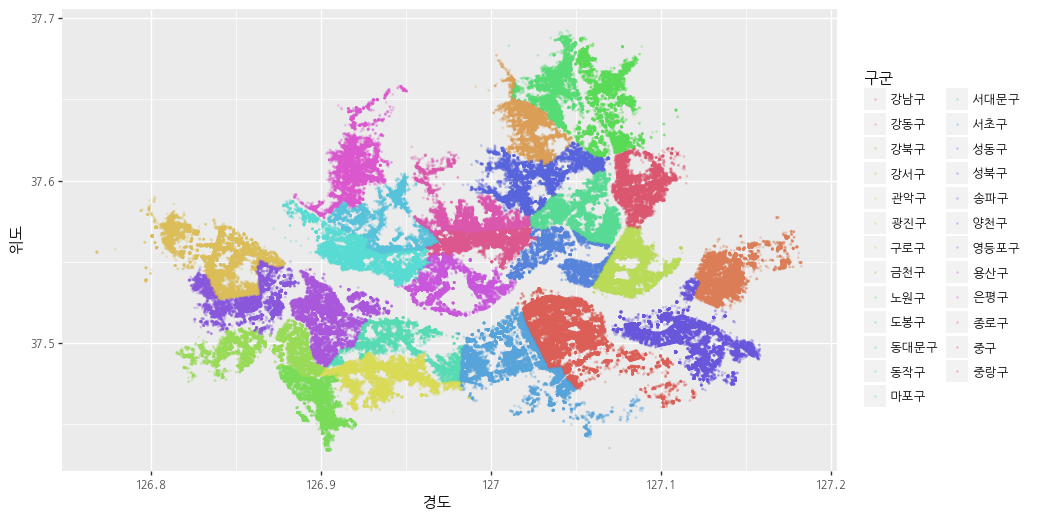

<ggplot: (-9223371915327533333)>

In [19]:
ggplot(shop_seoul, aes(x = "경도", y = "위도", color = "구군")) \
    + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

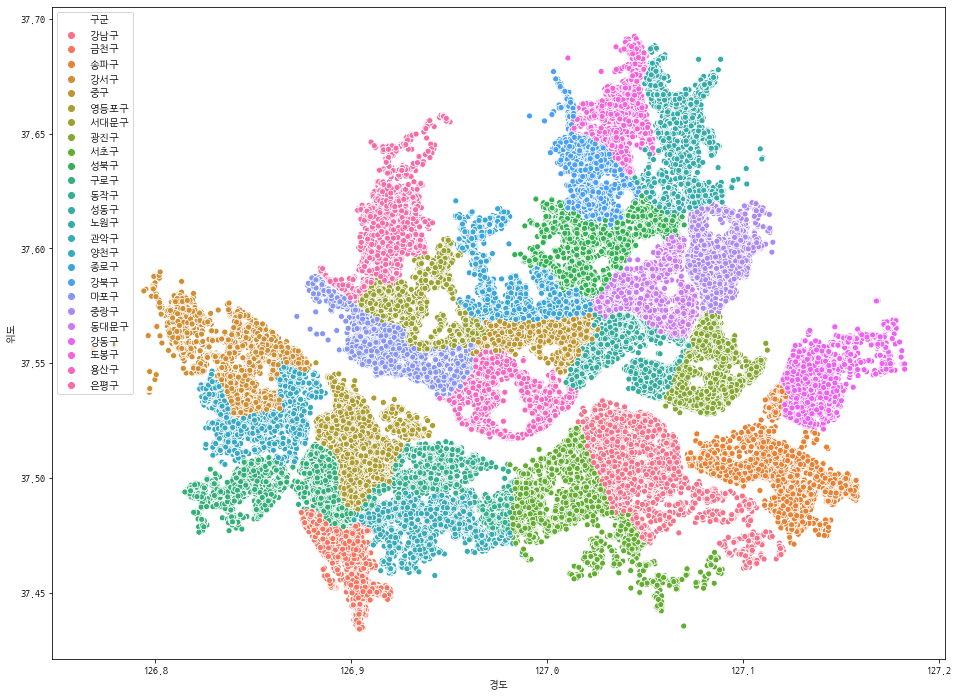

In [20]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul, x = "경도", y = "위도", hue = "구군")

In [21]:
shop_seoul["상권업종대분류명"].value_counts()

음식          112894
소매          106490
생활서비스        57266
학문/교육        27717
의료           15299
부동산          13164
관광/여가/오락      9536
숙박            2790
스포츠            112
Name: 상권업종대분류명, dtype: int64

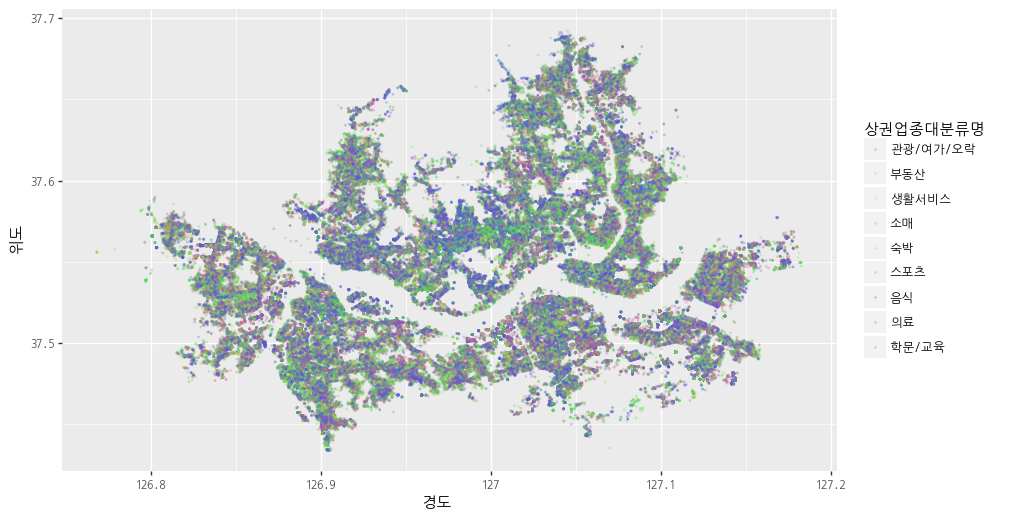

<ggplot: (-9223371915304544189)>

In [22]:
ggplot(shop_seoul, aes(x = "경도", y = "위도", color = "상권업종대분류명")) \
    + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + scale_fill_gradient(low = "blue", high = "green")

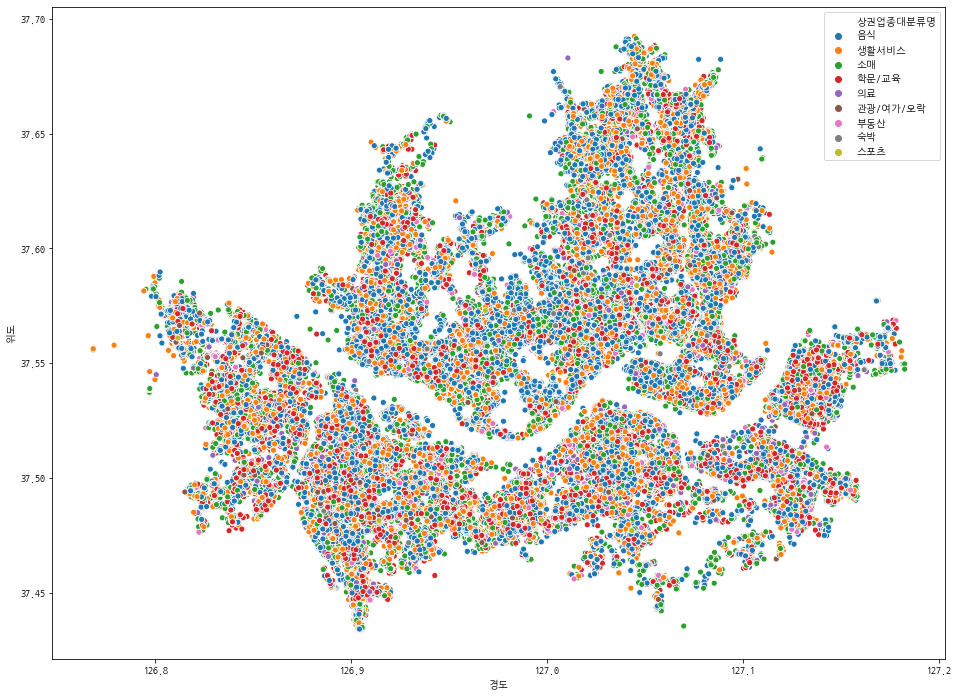

In [23]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul, x = "경도", y = "위도", hue = "상권업종대분류명")

In [24]:
# 학문/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul["상권업종대분류명"] == "학문/교육"]
shop_seoul_edu.head()

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
52   20736806     안재형영어  NaN         R    학문/교육       R04       학원-어학   
67   20769711       정아트  NaN         R    학문/교육       R05   학원-음악미술무용   
86   20776515  GIA보석교육원  NaN         R    학문/교육       R03  학원-자격/국가고시   
120  20887860     경찰태권도  NaN         R    학문/교육       R07   학원-예능취미체육   
142  20907491   파랑새어린이집  NaN         R    학문/교육       R08        유아교육   

    상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호   신우편번호  \
52     R04A01  학원-외국어/어학   P85502  ...  서울특별시 양천구 목동서로 133-2  158050  7988.0   
67     R05A01   서예/서화/미술   P85620  ...  서울특별시 강서구 양천로73가길 21  157861  7541.0   
86     R03A11    학원-보석감정   P85659  ...    서울특별시 강남구 압구정로 320  135896  6017.0   
120    R07A20       태권도장   P85611  ...      서울특별시 성북구 길음로 20  136110  2725.0   
142    R08A02       어린이집   Q87210  ...     서울특별시 도봉구 덕릉로 329  132040  1424.0   

     동정보 층정보  호정보          경도         위도     시도   구군  
52   NaN   7  NaN  126.875973  37.531592  서울특별시  양천구  
67   NaN   2  NaN  126.873645  37.550924  서울특별시  강서구  
86   NaN   5  NaN  127.036437  37.528532  서울특별시  강남구  
120  NaN   5  NaN  127.023020  37.604749  서울특별시  성북구  
142  NaN   1  NaN  127.045486  37.644831  서울특별시  도봉구  

[5 rows x 41 columns]

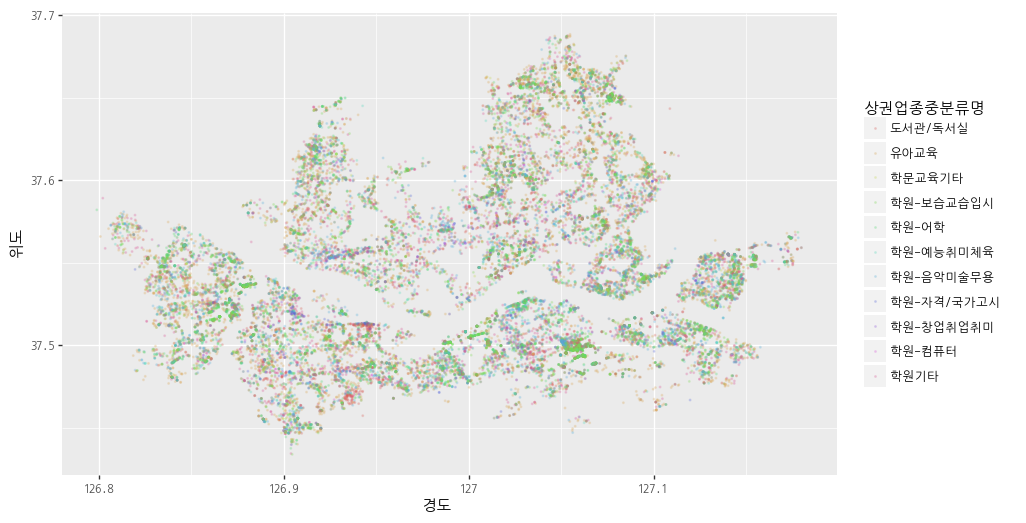

<ggplot: (121546768006)>

In [25]:
ggplot(shop_seoul_edu, aes(x = "경도", y = "위도", color = "상권업종중분류명")) \
    + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \

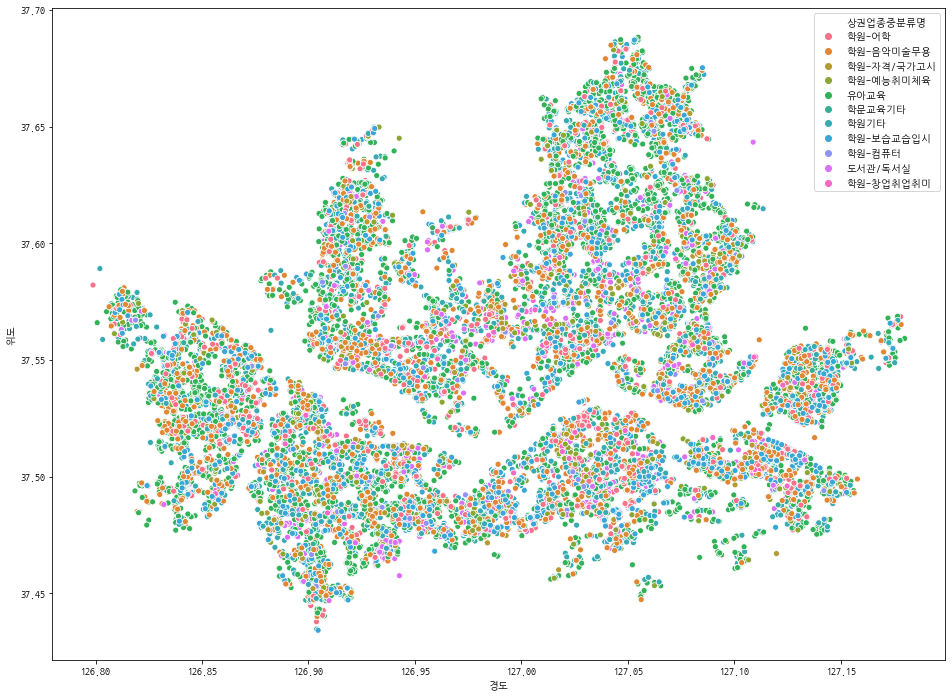

In [26]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul_edu, x = "경도", y = "위도", hue = "상권업종중분류명")

In [27]:
# 부동산과 관련된 정보 보기
shop_seoul_realty = shop_seoul[shop_seoul["상권업종대분류명"] == "부동산"]
shop_seoul_realty.head()

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
127  20923088     화랑공인중개사사무소  NaN         L      부동산       L01    부동산중개   
145  20846187     반석공인중개사사무소  NaN         L      부동산       L01    부동산중개   
153  20903064  부동산명가공인중개사사무소  NaN         L      부동산       L01    부동산중개   
155  20968054     강변공인중개사사무소  NaN         L      부동산       L01    부동산중개   
160  20883281          중앙부동산  NaN         L      부동산       L01    부동산중개   

    상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호   신우편번호  \
127    L01A01    부동산중개   L68221  ...   서울특별시 노원구 화랑로51길 17  139729  1800.0   
145    L01A01    부동산중개   L68221  ...     서울특별시 강동구 고덕로 210  134756  5267.0   
153    L01A01    부동산중개   L68221  ...    서울특별시 송파구 삼전로6길 18  138838  5592.0   
155    L01A01    부동산중개   L68221  ...    서울특별시 서초구 잠원로12길 4  137907  6517.0   
160    L01A01    부동산중개   L68221  ...  서울특별시 서초구 신반포로15길 29  137040  6503.0   

     동정보  층정보  호정보          경도         위도     시도   구군  
127  NaN    1  NaN  127.089345  37.623066  서울특별시  노원구  
145  NaN  NaN  NaN  127.147049  37.553801  서울특별시  강동구  
153  NaN    1  NaN  127.089034  37.502621  서울특별시  송파구  
155  NaN  NaN  NaN  127.012702  37.518127  서울특별시  서초구  
160  NaN    1  NaN  126.994682  37.505459  서울특별시  서초구  

[5 rows x 41 columns]

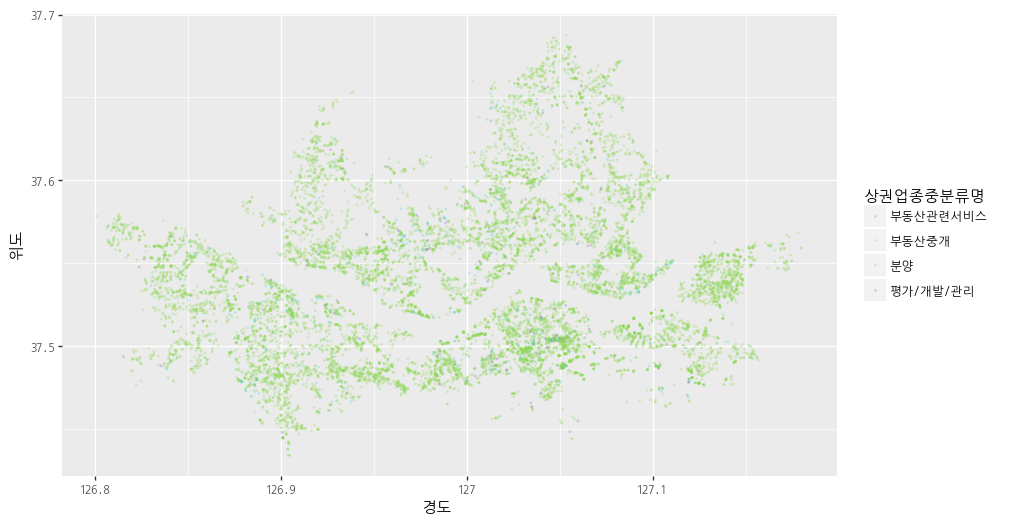

<ggplot: (-9223371915310748230)>

In [28]:
ggplot(shop_seoul_realty, aes(x = "경도", y = "위도", color = "상권업종중분류명")) \
    + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \

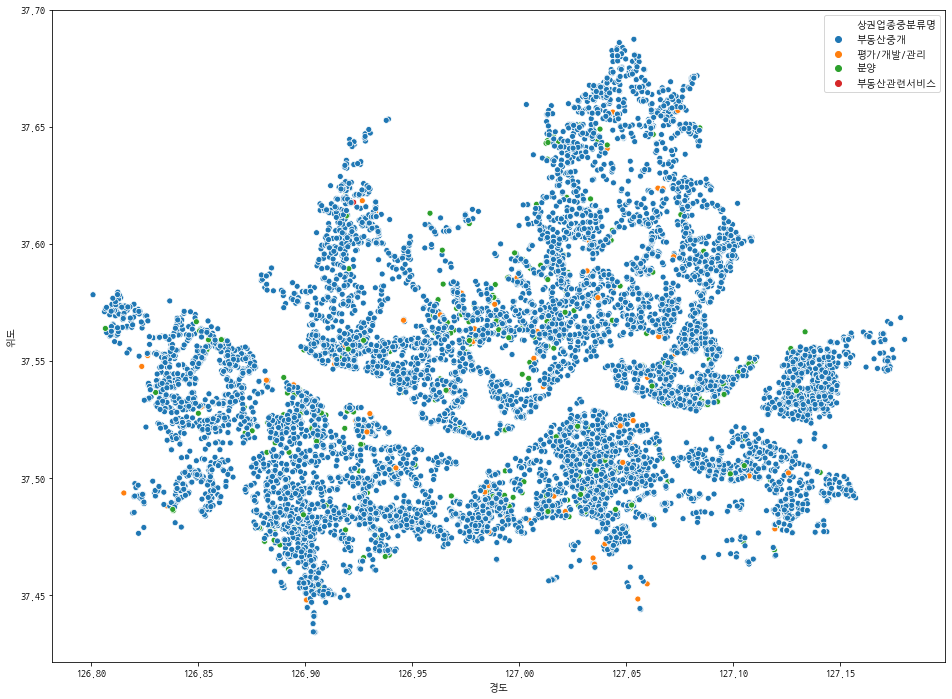

In [29]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul_realty, x = "경도", y = "위도", hue = "상권업종중분류명")

In [30]:
# 학원-컴퓨터
shop_seoul_edu_computer = shop_seoul[shop_seoul["상권업종중분류명"] == "학원-컴퓨터"]
shop_seoul_edu_computer.head()

상가업소번호          상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
442   22350142    아이비씨에듀케이션  NaN         R    학문/교육       R06   학원-컴퓨터   
2687  20850409  서원초등학교컴퓨터교실  NaN         R    학문/교육       R06   학원-컴퓨터   
3678  21780700     이찬진컴퓨터교실  NaN         R    학문/교육       R06   학원-컴퓨터   
3872  21747169      백상컴퓨터학원  NaN         R    학문/교육       R06   학원-컴퓨터   
5517  22349871      보성컴퓨터학원  NaN         R    학문/교육       R06   학원-컴퓨터   

     상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호   신우편번호  \
442     R06A01    컴퓨터학원   P85691  ...      서울특별시 은평구 불광로 51  122040  3358.0   
2687    R06A01    컴퓨터학원   P85691  ...     서울특별시 서초구 고무래로 63  137040  6598.0   
3678    R06A01    컴퓨터학원   P85691  ...  서울특별시 성북구 정릉로38다길 29  136100  2816.0   
3872    R06A01    컴퓨터학원   P85691  ...  서울특별시 구로구 구로중앙로7길 28  152050  8312.0   
5517    R06A01    컴퓨터학원   P85691  ...   서울특별시 성북구 장위로15길 16  136140  2755.0   

      동정보  층정보  호정보          경도         위도     시도   구군  
442   NaN  NaN  NaN  126.930696  37.613419  서울특별시  은평구  
2687  NaN    1  NaN  127.014605  37.502429  서울특별시  서초구  
3678  NaN    1  NaN  127.017025  37.601564  서울특별시  성북구  
3872  NaN    4  NaN  126.889592  37.491327  서울특별시  구로구  
5517  NaN  NaN  NaN  127.041859  37.614905  서울특별시  성북구  

[5 rows x 41 columns]

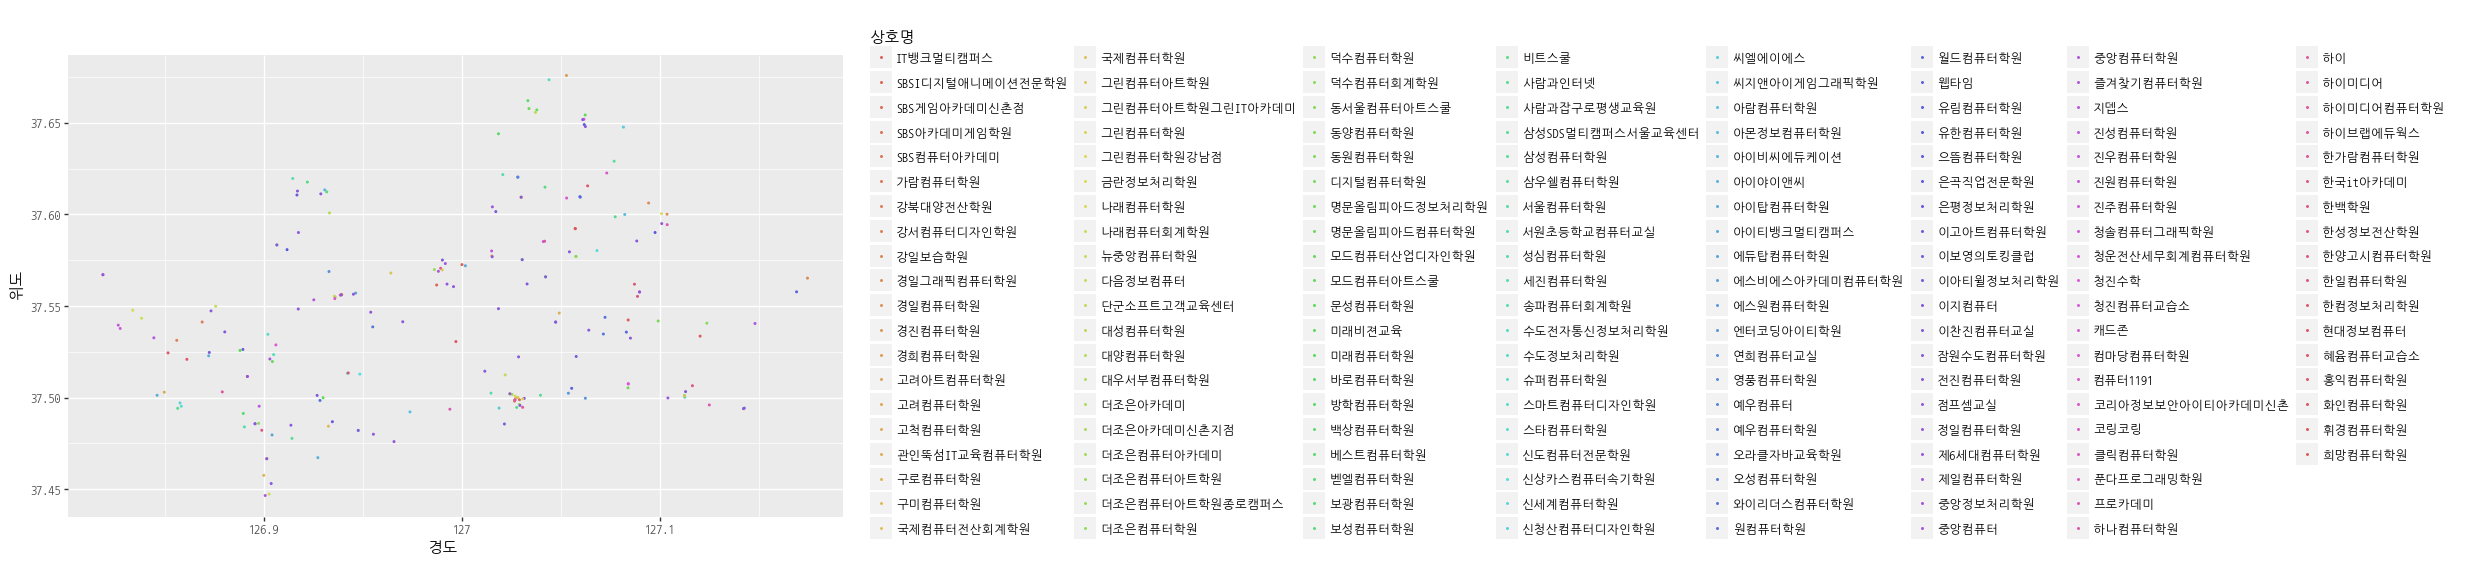

<ggplot: (-9223371915305318589)>

In [31]:
ggplot(shop_seoul_edu_computer, aes(x = "경도", y = "위도", color = "상호명")) \
    + geom_point(size = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \

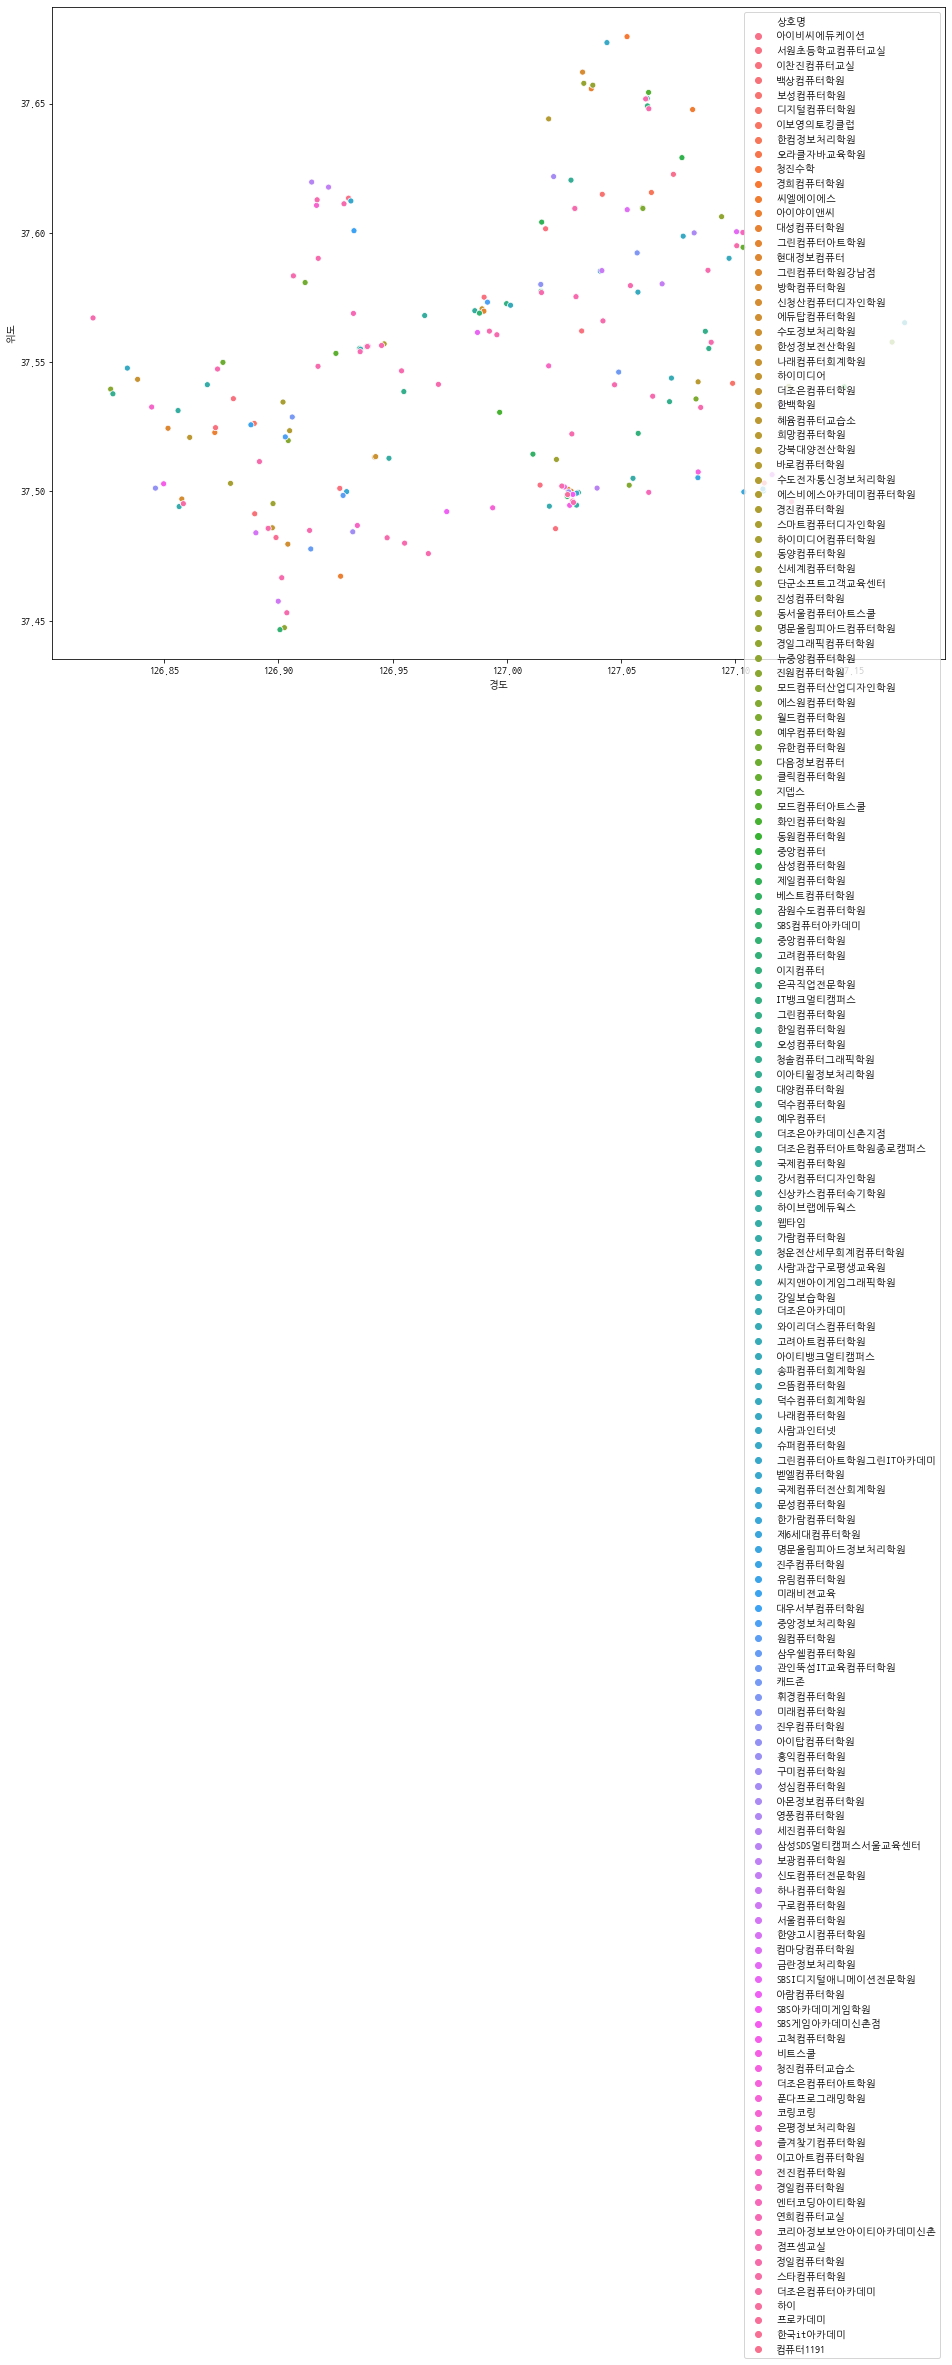

In [32]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul_edu_computer, x = "경도", y = "위도", hue = "상호명")

In [42]:
import folium

computer = shop_seoul_edu_computer
edu_map = folium.Map(location = [computer["위도"].mean(), computer["경도"].mean()], 
                     zoom_start = 12, tiles = "Stamen Terrain")

for n in computer.index:
    shop_name = computer.loc[n, "상호명"] + " - " + computer.loc[n, "도로명주소"]
    folium.Marker(location = [computer.loc[n, "위도"], computer.loc[n, "경도"]], 
                 popup = shop_name).add_to(edu_map)

edu_map.save("./output/edu_map.html")
edu_map

In [44]:
# 커피전문점/카페
shop_seoul_eat = shop_seoul[shop_seoul["상권업종중분류명"] == "커피점/카페"]
shop_seoul_eat.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1   19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12   커피점/카페   
8   20020124          스완카페트         NaN         Q       음식       Q12   커피점/카페   
11  19973708             왕실         NaN         Q       음식       Q12   커피점/카페   
15  20004707            커피빈      코리아교대점         Q       음식       Q12   커피점/카페   
17  19993199   고려대학교교육관쎄리오점         NaN         Q       음식       Q12   커피점/카페   

   상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                    도로명주소   구우편번호  \
1     Q12A01  커피전문점/카페/다방   I56220  ...       서울특별시 강남구 선릉로93길 6  135080   
8     Q12A01  커피전문점/카페/다방   I56220  ...  서울특별시 영등포구 도신로10가길 11-1  150070   
11    Q12A01  커피전문점/카페/다방   I56220  ...      서울특별시 중구 남대문로 52-13  100810   
15    Q12A01  커피전문점/카페/다방   I56220  ...      서울특별시 서초구 서초중앙로 118  137070   
17    Q12A01  커피전문점/카페/다방   I56220  ...        서울특별시 성북구 안암로 145  136701   

     신우편번호  동정보 층정보  호정보          경도         위도     시도    구군  
1   6149.0  NaN   1  NaN  127.047883  37.505675  서울특별시   강남구  
8   7379.0  NaN   2  NaN  126.897710  37.503693  서울특별시  영등포구  
11  4535.0  NaN   1  NaN  126.982419  37.562274  서울특별시    중구  
15  6634.0  NaN   1  NaN  127.014217  37.492388  서울특별시   서초구  
17  2841.0  NaN   1   32  127.031702  37.588485  서울특별시   성북구  

[5 rows x 41 columns]

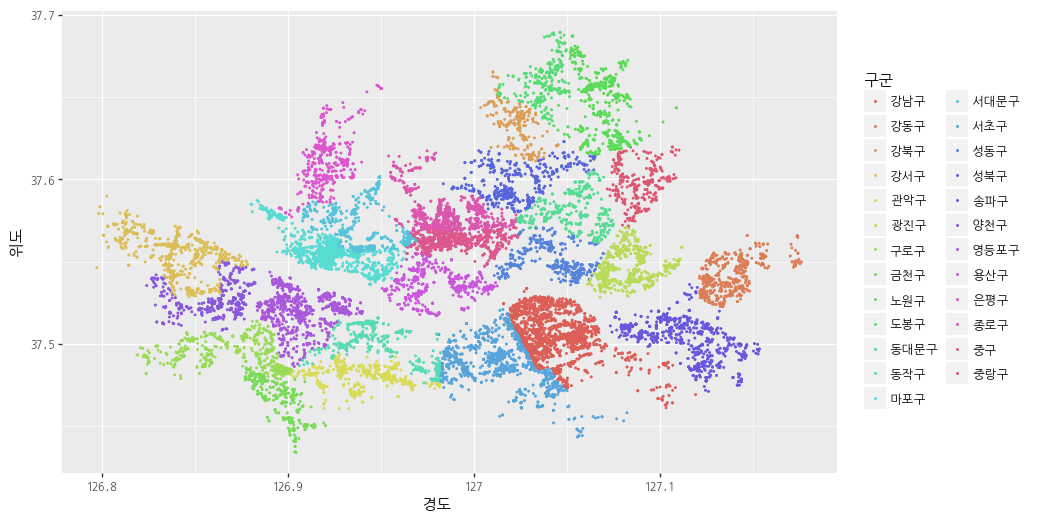

<ggplot: (-9223371915296831316)>

In [45]:
ggplot(shop_seoul_eat, aes(x = "경도", y = "위도", color = "구군")) \
    + geom_point(size = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

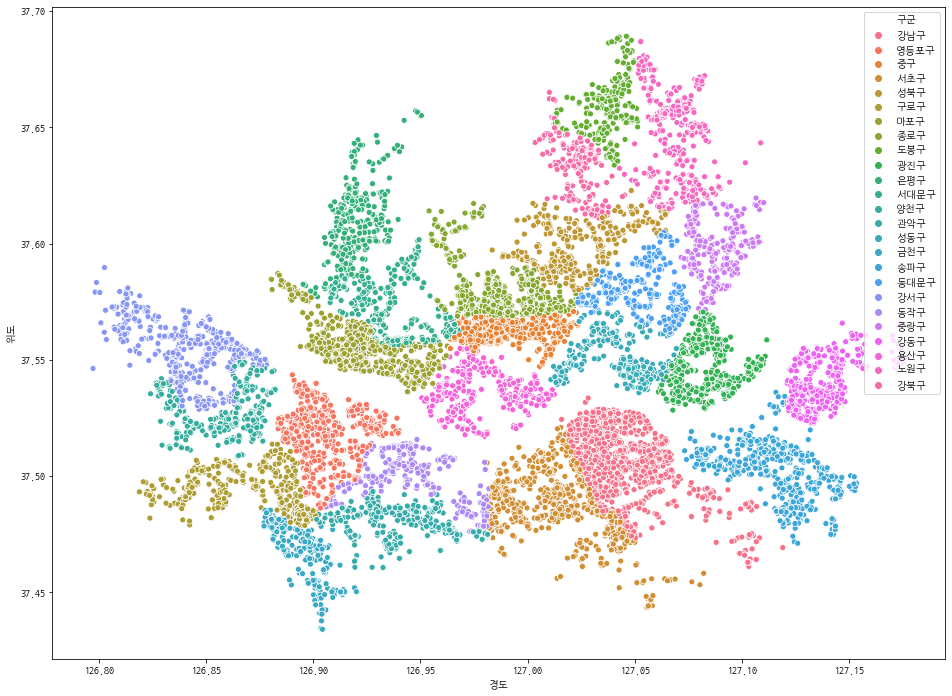

In [47]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = shop_seoul_eat, x = "경도", y = "위도", hue = "구군")

In [54]:
eat = shop_seoul_eat[shop_seoul_eat["구군"] == "중구"]
eat_map = folium.Map(location = [eat["위도"].mean(), eat["경도"].mean()], zoom_start = 15)

for n in eat.index:
    shop_name = eat.loc[n, "상호명"] + " - " + eat.loc[n, "도로명주소"]
    folium.Marker(location = [eat.loc[n, "위도"], eat.loc[n, "경도"]],
                 popup = shop_name).add_to(eat_map)

eat_map.save("./output/eat_map.html")
eat_map